In [1]:
# 학생 1 : 평균 수학 점수 80점, 표준편차 20
# 학생 2 : 평균 수학 점수 50점, 표준편차 5
# 오늘 학생 1이 85점을 받았고, 학생 2가 65점을 받았을 때, 평소보다 잘한 학생은?

mu1 = 80
std1 = 20
today1 = 85

mu2 = 50
std2 = 5
today2 = 65

Z1 = (today1 - mu1) / std1
Z2 = (today2 - mu2) / std2

Z1, Z2 # Z1 < Z2 이기 때문에 학생 1이 학생 2보다 잘했더라도, 평소 보다 더 잘한 것은 학생 2

(0.25, 3.0)

In [6]:
# 성공 확률이 0.2일 때, 첫번째에 실패하고 두번째에 성공할 확률은?
p = 0.2
q = (1 - p)

p * q # P(X = 2)

0.16000000000000003

In [7]:
# 5번보다 적은 횟수 안에 성공할 확률은?
1 - q ** 5 # P(X <= 5)

0.6723199999999999

In [10]:
# 초콜릿 안에 20% 확률로 골든 티켓이 있을 때, 골든 티켓을 처음으로 발견하기 전까지 4개의 초콜릿보다 적은 초콜릿을 열어볼 확률은?
p = 0.2
mu = 1 / p
var = (1 - p) / (p ** 2)

# P(X <= 3)
1 - (1 - p) ** 3

0.4879999999999999

In [11]:
# P(-0.15 < Z < 0.5)
from scipy.stats import norm

# 누적분포함수(CDF) 사용
prob = norm.cdf(0.5) - norm.cdf(-0.15)

print(f"P(-0.15 < Z < 0.5) = {prob:.4f}")

P(-0.15 < Z < 0.5) = 0.2511


In [12]:
# P(X < 5) = 0.0045, P(X < 15) = 0.9641일 때, 평균값과 표준편차는?
from scipy.stats import norm

p1 = 0.0045
p2 = 0.9641

z1 = norm.ppf(p1)  # for X = 5
z2 = norm.ppf(p2)  # for X = 15

print(z1, z2)

# (5 - mu) / std = -2.612
# (15 - mu) / std = 1.8
# 두 연립 방정식을 풀면
# mu = 10.9, std = 2.267

-2.6120541412292777 1.800384161326843


In [13]:
# X ~ B(12, 0.5)에서 P(X <= 6)?
from scipy.stats import binom

# 이항분포: n = 12, p = 0.5
n = 12
p = 0.5

# P(X <= 6)
binom_prob = binom.cdf(6, n, p)
print(f"[이항분포] P(X <= 6) = {binom_prob:.4f}")

[이항분포] P(X <= 6) = 0.6128


In [14]:
from scipy.stats import norm
import math

mu = n * p  # 평균
std = math.sqrt(n * p * (1 - p))  # 표준편차

# 연속성 보정: 6 -> 6.5
z = (6.5 - mu) / std
normal_approx = norm.cdf(z)

print(f"[정규분포 근사] P(X <= 6) ≈ {normal_approx:.4f}")

[정규분포 근사] P(X <= 6) ≈ 0.6136


In [15]:
# 기계가 고장나는 횟수가 40이고 푸아송 분포를 따를 때, 첫 해에 고장나는 횟수가 52회 미만일 확률?
from scipy.stats import poisson

λ = 40
k = 51  # X < 52 는 X <= 51

poisson_prob = poisson.cdf(k, λ)
print(f"[푸아송 분포] P(X < 52) = {poisson_prob:.4f}")

[푸아송 분포] P(X < 52) = 0.9613


In [16]:
from scipy.stats import norm
import math

mu = λ
sigma = math.sqrt(λ)

z = (51.5 - mu) / sigma  # 연속성 보정: 52 -> 51.5
normal_approx = norm.cdf(z)
print(f"[정규 근사] P(X < 52) ≈ {normal_approx:.4f}")

[정규 근사] P(X < 52) ≈ 0.9655


In [9]:
# 어느 기관에서 시간당 10건의 전화를 받는다. 5분 내에 1건 이상 전화 받을 확률은?
from scipy.stats import poisson

# 시간당 10건 -> 60분당 10건 
# 평균 발생 건수 (lambda): 5분 동안 평균 0.8333건
lambda_5min = 10 * (5 / 60)

# P(X >= 1) = 1 - P(X = 0)
prob_at_least_one = 1 - poisson.pmf(0, lambda_5min)

print(f"5분 내에 1건 이상 전화 받을 확률: {prob_at_least_one:.4f}")

5분 내에 1건 이상 전화 받을 확률: 0.5654


In [3]:
# 이항분포 B(n=100, p=0.02)를 포아송 분포로 근사하여 X = 0일 확률?
from scipy.stats import poisson

n = 100
p = 0.02
ld = n * p

poisson.pmf(0, ld)

0.1353352832366127

In [4]:
# 어떤 버스는 시간 당 평균 5대의 호출 요청을 받을 때, 시간 당 3대 이상의 호출을 받을 확률은?
from scipy.stats import poisson

# 평균 호출 수 (lambda)
lam = 5

# P(X >= 3) = 1 - P(X <= 2)
prob = 1 - poisson.cdf(2, lam)

print(f"시간당 3대 이상의 호출을 받을 확률: {prob:.4f}")

시간당 3대 이상의 호출을 받을 확률: 0.8753


In [5]:
# 성공확률이 0.05일 때, 50번 시도해서 5번 성공할 확률은?
from scipy.stats import binom # 이항분포
from scipy.stats import poisson # 푸아송 분포

n = 50
p = 0.05
np = 2.5

ld = np

binom.pmf(5, n, p), poisson.pmf(5, ld)

(0.06584063715436414, 0.06680094289054267)

In [13]:
import math

# 평균 제작 시간 (단위: 분)
mean_time = 20

# 지수분포의 λ (lambda = 1 / 평균 시간)
lambda_ = 1 / mean_time

# 관심 있는 시간 t (10분)
t = 20

# 확률 밀도 함수 f(t) = λ * e^(-λt)
pdf = lambda_ * math.exp(-lambda_ * t)

# 누적 분포 함수 P(T <= t) = 1 - e^(-λt)
cdf = 1 - math.exp(-lambda_ * t)

# 출력
print(f"f(10) (확률 밀도): {pdf:.4f}")
print(f"P(T <= 10) (10분 이내 확률): {cdf:.4f}")

f(10) (확률 밀도): 0.0184
P(T <= 10) (10분 이내 확률): 0.6321


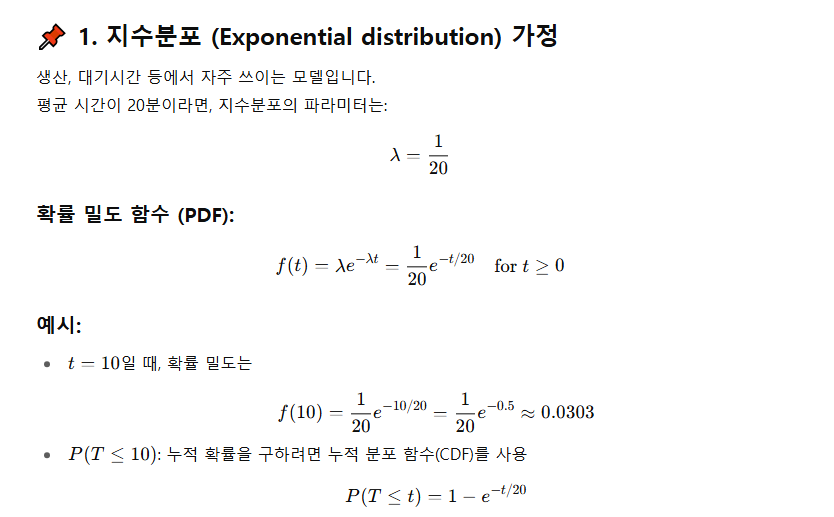

In [17]:
import numpy as np
from scipy.stats import chi2
# 주사위를 60번 던졌을 때, 1 ~ 6이 나온 횟수

# 관측값
observed = np.array([5, 9, 10, 11, 12, 13])
# 기대값 (공정한 주사위라면 각 면이 10번 나와야 함)
expected = np.array([10, 10, 10, 10, 10, 10])

chi_squared_stat = np.sum((observed - expected) ** 2 / expected)

print(f"Chi-squared Statistic: {chi_squared_stat:.4f}")

# 자유도
df = 5

# p-value 계산 (우측 누적 확률)
p_value = 1 - chi2.cdf(chi_squared_stat, df)

print(f"p-value: {p_value:.4f}")

Chi-squared Statistic: 4.0000
p-value: 0.5494


In [ ]:
# 조건 C 하에서 사건 A와 B가 조건부 독립(conditional independence)이라면 다음의 조건을 만족
# P(A,B∣C) = P(A∩B∣C)=P(A∣C)⋅P(B∣C)
# P(A∣B,C)=P(A∣C)
# P(B∣A,C)=P(B∣C)

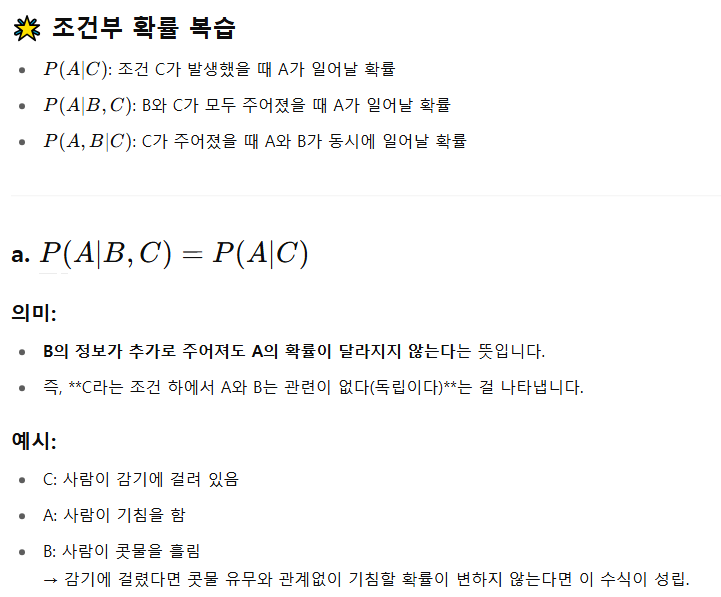
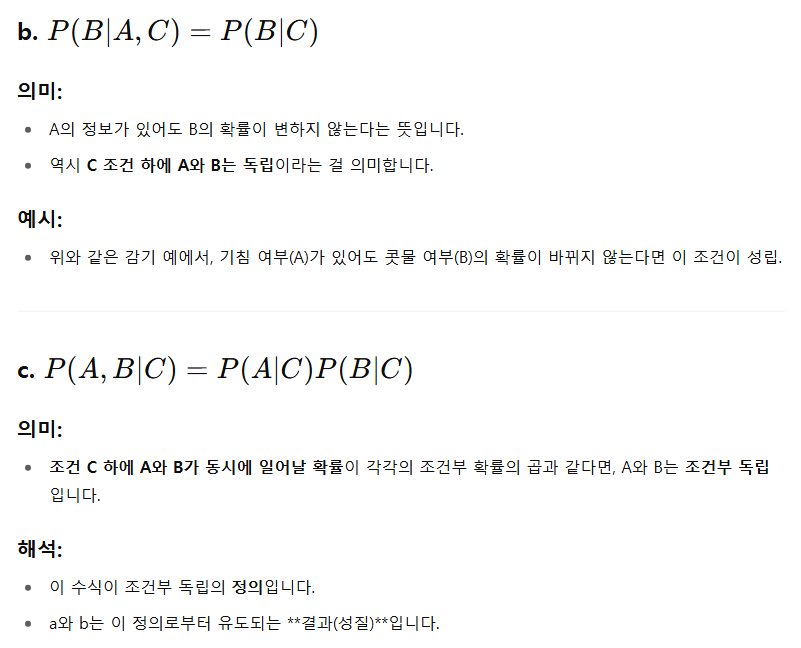

In [ ]:
# 신뢰구간 문제

In [ ]:
# 영어 시험 난이도를 측정하기 위해 25명의 학생을 선택
# 평균은 75, 표준 편차는 8이고 정규 분포를 따르며, 학생들의 성적이 독립이라면,
# 영어 시험 모평균의 95% 신뢰구간은?

### 모표준편차 σ를 모르기 때문에 표준정규분포 대신 t-분포 사용
#### 표본의 수가 25이므로 df = 25 - 1
#### 표본 표준편차 s로 대체 가능 

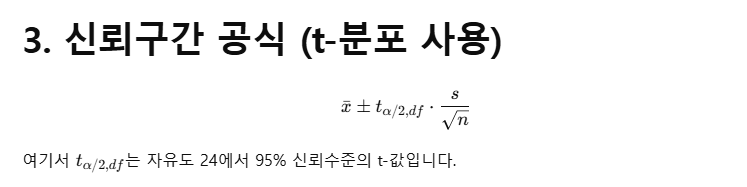

In [15]:
import math
import numpy as np
from scipy.stats import t

# 주어진 값
mean = 75
s = 8  # 표본 표준편차
n = 25
confidence = 0.95
df = n - 1

# t-score 구하기
t_score = t.ppf(1 - (1 - confidence) / 2, df)

# 오차범위 계산
margin = t_score * (s / math.sqrt(n))

# 신뢰구간
lower = mean - margin
upper = mean + margin

print(f"t-분포 기반 95% 신뢰구간: [{lower:.3f}, {upper:.3f}]")

t-분포 기반 95% 신뢰구간: [71.698, 78.302]


In [ ]:
# 샘플 9개를 검사해서 농도가 10이하라면, 샘플을 폐기한다.
# 샘플 9개의 평균은 9, 분산이 0.16이고 정규 분포를 따르고, 각 샘플은 독립일 때, 
# p-value를 구하기 위한 확률 분포와 검정통계량은?
# 귀무가설 : 샘플의 모평균 = 10
# 대립가설 : 샘플의 모평균 < 10 (좌측꼬리)

### 모표준편차 σ를 모르기 때문에 표준정규분포 대신 t-분포 사용
### df = 9 - 1
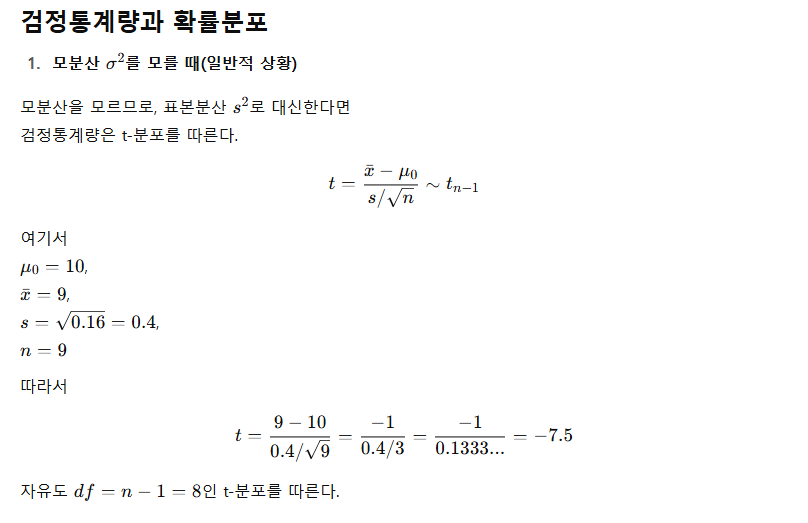

In [17]:
from scipy import stats

# 주어진 값들
n = 9
df = n - 1
sample_mean = 9
mu_0 = 10
sample_variance = 0.16
sample_std = sample_variance ** 0.5

# 검정통계량 계산
t_stat = (sample_mean - mu_0) / (sample_std / (n ** 0.5))
print(f"검정통계량 t = {t_stat:.4f}")

# p-value 계산 (왼쪽 꼬리 검정)
p_value = stats.t.cdf(t_stat, df)
print(f"p-value = {p_value:.6f}")

검정통계량 t = -7.5000
p-value = 0.000035


In [ ]:
# 25개의 표본 평균이 정규분포를 따른다고 가정.
# 샘플의 두께가 1.5인지 확인하려고 한다.
# 표준편차가 0.16이고 모표준편차라고 가정할 수 있을 때,
# 25개의 샘플 두께가 모평균이 1.5인지 여부를 검정할 기각역을 표본 평균으로 나타내면? (유의수준 5%)

### 모분산을 알고 있으므로 Z 검정을 사용
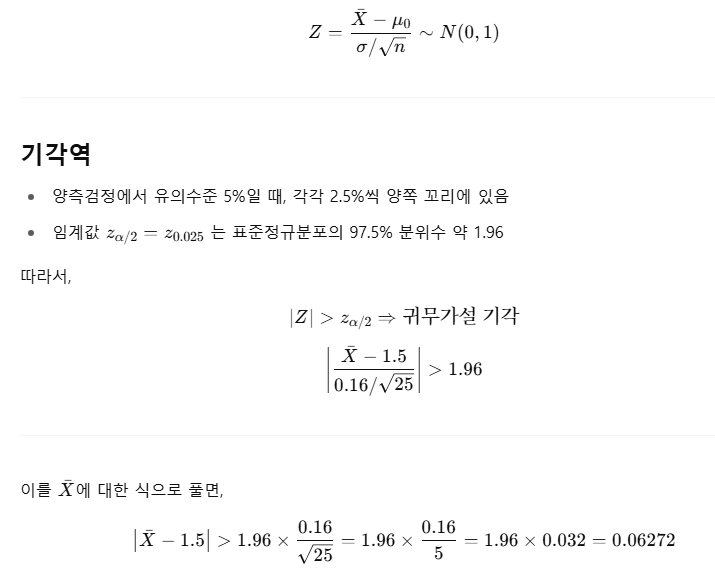

In [19]:
from scipy.stats import norm
import math

# 주어진 값
alpha = 0.05
n = 25
mu_0 = 1.5
sigma = 0.16  # 모표준편차

# 임계값 계산 (양측검정)
z_critical = norm.ppf(1 - alpha/2)

# 표준오차
se = sigma / math.sqrt(n)

# 기각역 (표본평균)
lower_bound = mu_0 - z_critical * se
upper_bound = mu_0 + z_critical * se

print(f"유의수준 {alpha*100}% 양측검정에서 기각역은 표본평균이")
print(f"{lower_bound:.5f} 미만이거나 {upper_bound:.5f} 초과인 경우입니다.")

유의수준 5.0% 양측검정에서 기각역은 표본평균이
1.43728 미만이거나 1.56272 초과인 경우입니다.


In [ ]:
# 그룹 A, B는 정규분포를 따르고 서로 독립
# 그룹 A의 모집단의 표본의 표본 분산이 15이고 표본수가 21
# 그룹 B의 모집단의 표본의 표본 분산이 17이고 표본수가 27
# 두 모집단의 등분산 여부를 F 분포를 사용하여 검정하라

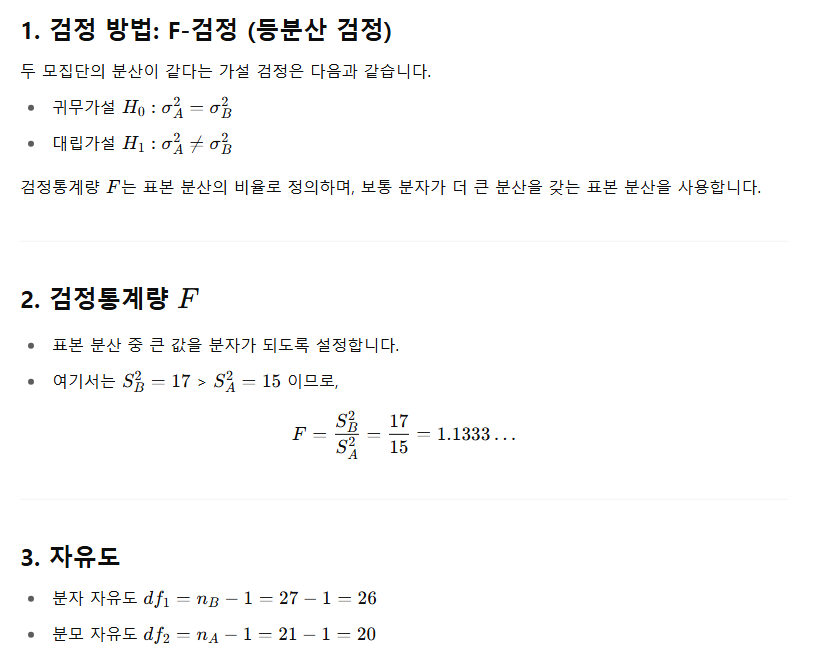

In [ ]:
# 선형 회귀 분석에서 잔차의 자유도가 20, 회귀계수가 2개,  잔차의 제곱합이 100 회귀 변동량이 150일때 F검정통계량은?

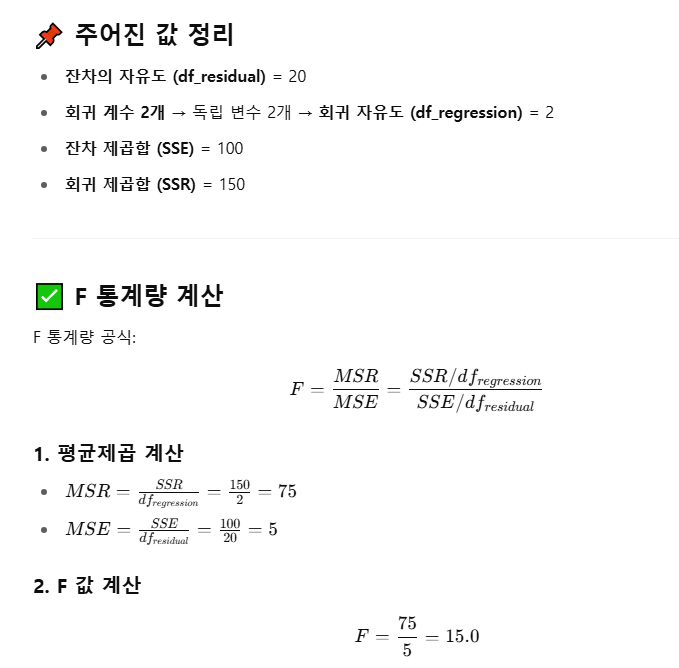